# 🏥 **Obesity Risk Classification & Modeling**
**Author:** Vinit Vijaykumar Adke  
**Domain:** Healthcare Analytics / Predictive Modeling

---

### 📌 **Executive Summary**
**Business Problem:** Obesity is a global health challenge. Early identification of high-risk individuals allows healthcare providers to target interventions more effectively.
**Objective:** Build a machine learning model to classify obesity levels based on lifestyle factors (diet, physical activity, transportation).

### 📊 **Methodology**
1.  **Data Preprocessing:** Handled categorical variables and balanced the dataset using **SMOTE** (Synthetic Minority Over-sampling Technique) to fix class imbalance.
2.  **Exploratory Data Analysis (EDA):** Analyzed correlations between calorie consumption (`FAVC`), transportation (`MTRANS`), and obesity levels.
3.  **Modeling:** Trained and evaluated three classifiers:
    * **Random Forest** (Best Performer)
    * Decision Tree
    * K-Nearest Neighbors (KNN)

### 🚀 **Key Results**
* **Accuracy:** Achieved high accuracy in identifying "Obesity Type III" and "Normal Weight" categories.
* **Insight:** "Transportation Mode" and "Family History" were identified as top predictors of obesity risk.

---

# **SCM 516 FINAL PROJECT**

In [447]:
# Necessary imports for preprocessing and machine learning

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# if you want to use one Hot encoder then you need to import the below onw
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer   # interpolation for missing values
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns 


In [448]:
# load the dataset

df=pd.read_csv("ObesityDataSet.csv")

In [449]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,CALC,MTRANS,Outcome
0,Female,21,1.62,64.00,yes,no,2.00,Sometimes,no,2.00,no,0.00,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.00,Sometimes,yes,3.00,yes,3.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.00,Sometimes,no,2.00,no,2.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.00,Sometimes,no,2.00,no,2.00,Frequently,Walking,Overweight
4,Male,22,1.78,89.80,no,no,2.00,Sometimes,no,2.00,no,0.00,Sometimes,Public_Transportation,Overweight


In [450]:
# Descriptive statistics of data

df.describe()

,Age,Height,Weight,FCVC,CH2O,FAF
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.32,1.70,86.59,2.42,2.01,1.01
std,6.36,0.09,26.19,0.53,0.61,0.85
min,14.00,1.45,39.00,1.00,1.00,0.00
25%,20.00,1.63,65.47,2.00,1.58,0.12
50%,23.00,1.70,83.00,2.39,2.00,1.00
75%,26.00,1.77,107.43,3.00,2.48,1.67
max,61.00,1.98,173.00,3.00,3.00,3.00


In [451]:
# check the type of data and see if there is any missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   SMOKE                           2111 non-null   object 
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   object 
 11  FAF                             2111 non-null   float64
 12  CALC                            21

In [452]:
# find the total number of missing values for each variable

df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
CALC                              0
MTRANS                            0
Outcome                           0
dtype: int64

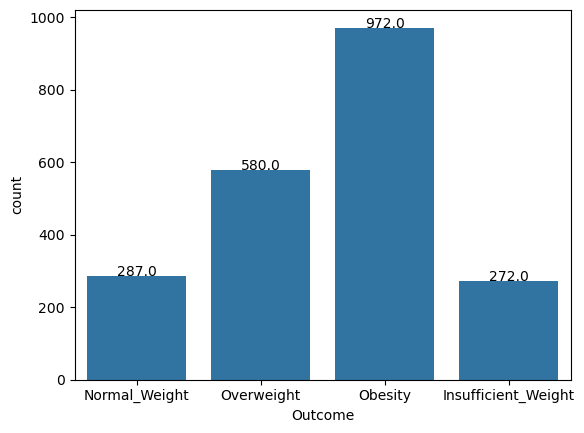

In [453]:
# Is the dataset balanced?

# Create the countplot
ax = sns.countplot(data=df, x='Outcome')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline')

# Display the plot
plt.show()

In [454]:
# the dataset is not balanced needs to be balanced using a resmapling tehcnique like SMOTE

In [455]:
# count the number of people who are Obese against number of people who are not Obese to see if the label/response
# is balanced or not

# Number of people who are obese
(df[['Outcome']]=="Obesity").sum()  

Outcome    972
dtype: int64

In [456]:
# No of people without obesity
(df[['Outcome']]!="Obesity").sum() 

Outcome    1139
dtype: int64

In [457]:
# Calculate the probability of having obesity
(df[['Outcome']]=="Obesity").sum() / len(df['Outcome'])

Outcome   0.46
dtype: float64

In [458]:
############   Handling Missing values  ################################

In [459]:
# How to get the list of all columns in my dataset

columns_list=df.columns.tolist()

In [460]:
columns_list

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'CALC',
 'MTRANS',
 'Outcome']

In [461]:
# We need to create a variable that stores the name of categorical columns
# as well a varibale that stores the name of numerical variable.
# because we need to handle missing values for categorical using mode technique
# we also need to replace the missing values of numerical variable using mean. You can alos use linear interpolcation

# List of categorical variables (dtype == object or category)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# List of numerical variables (dtype == int or float)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Display the lists
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Outcome']
Numerical columns: ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF']


In [462]:
df.isnull().sum()  

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
CALC                              0
MTRANS                            0
Outcome                           0
dtype: int64

In [463]:
# No need to replace missing values with mode/mean as there were no missing values in our dataset.

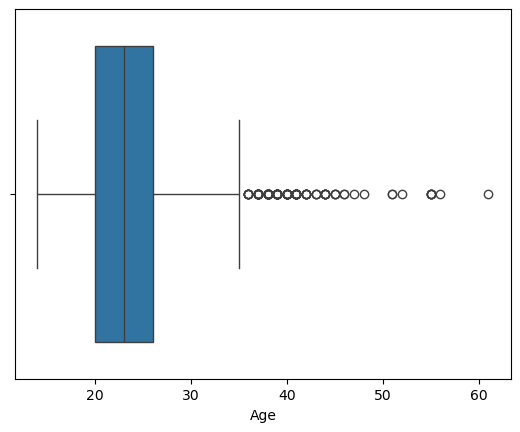

In [464]:
# Find and remove outlier from numerical variable

# Create a boxplot for the 'age' column to detect outliers

sns.boxplot(data=df, x='Age'); 

In [465]:
# Calculate the IQR for the 'age' column
Q1 = df['Age'].quantile(0.25)  # 25th percentile
Q3 = df['Age'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df1 = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# df1 is a new dataframe after removing outliers

# Display the results (rows without outliers)
print("Cleaned DataFrame (Without Age Outliers):")
print(df1)

Cleaned DataFrame (Without Age Outliers):
      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no  2.00   
1     Female   21    1.52   56.00                            yes   no  3.00   
2       Male   23    1.80   77.00                            yes   no  2.00   
3       Male   27    1.80   87.00                             no   no  3.00   
4       Male   22    1.78   89.80                             no   no  2.00   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes  3.00   
2107  Female   22    1.75  133.74                            yes  yes  3.00   
2108  Female   23    1.75  133.69                            yes  yes  3.00   
2109  Female   24    1.74  133.35                            yes  yes  3.00   
2110  Female   24    1.74  133.47                            yes  yes  3.00   

         

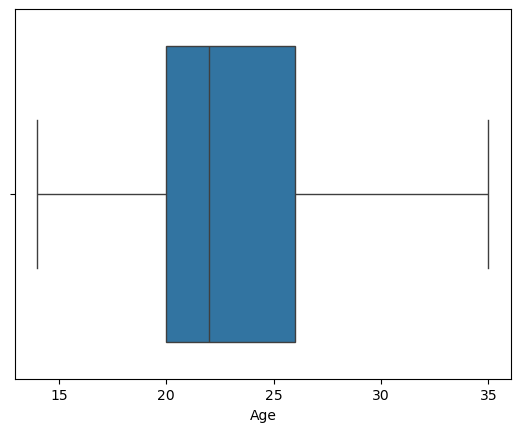

In [466]:
sns.boxplot(data=df1, x='Age');  # outliers have been removed

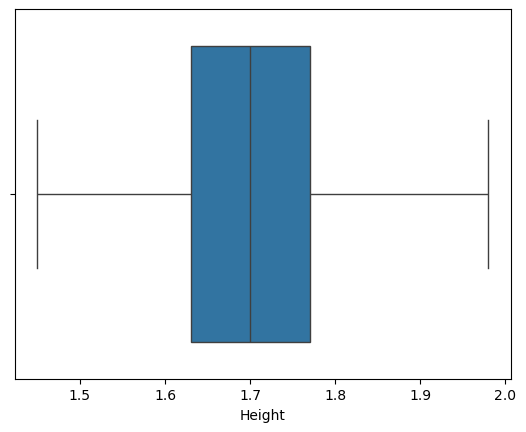

In [467]:
sns.boxplot(data=df1, x='Height');       # Check for outliers in Height 

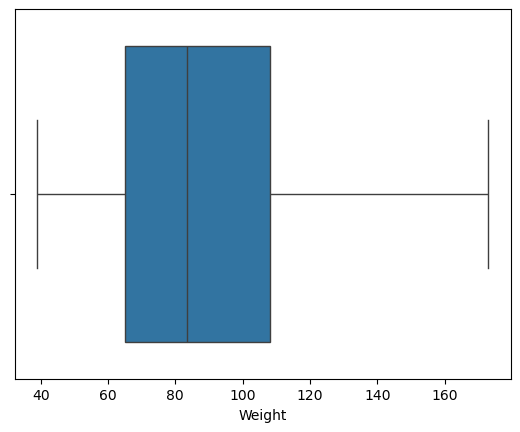

In [468]:
sns.boxplot(data=df1, x='Weight');        #Check for Outliers in Weight

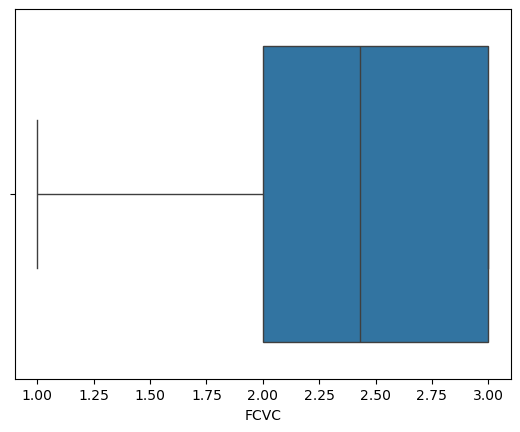

In [469]:
sns.boxplot(data=df1, x='FCVC');           #Check for Oultiers in FCVC

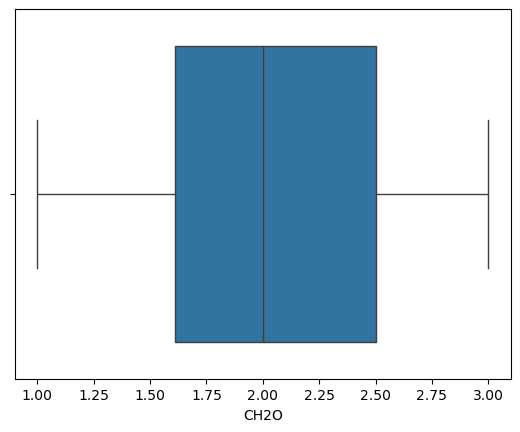

In [470]:
sns.boxplot(data=df1, x='CH2O');             #Check for Oultiers in CH2O

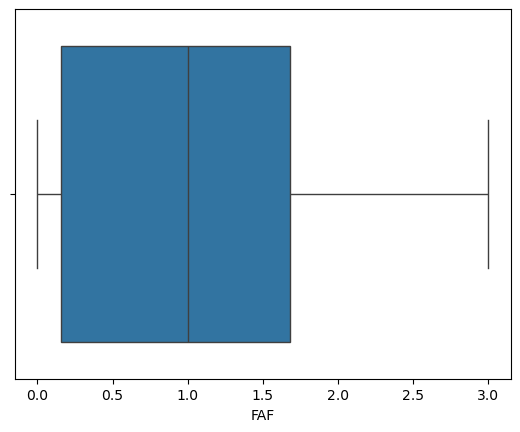

In [471]:
sns.boxplot(data=df1, x='FAF');                   #Check for Oultiers in FAF

In [472]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1951 non-null   object 
 1   Age                             1951 non-null   int64  
 2   Height                          1951 non-null   float64
 3   Weight                          1951 non-null   float64
 4   family_history_with_overweight  1951 non-null   object 
 5   FAVC                            1951 non-null   object 
 6   FCVC                            1951 non-null   float64
 7   CAEC                            1951 non-null   object 
 8   SMOKE                           1951 non-null   object 
 9   CH2O                            1951 non-null   float64
 10  SCC                             1951 non-null   object 
 11  FAF                             1951 non-null   float64
 12  CALC                            1951 no

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   SMOKE                           2111 non-null   object 
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   object 
 11  FAF                             2111 non-null   float64
 12  CALC                            21

In [474]:
# label Encoding

# in this datase, we have 9 categorical features (e.g., gender, FAVC, Smoke, and a response/lebel variable)

# we use the following function to encode categorical variable

from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

for col in categorical_cols:    # we define categorical_cols   in line [73]
    df1.loc[:,col]=lb.fit_transform(df1[col])   # note that df1 is new dataframe without outliers 

In [475]:
df1.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,CALC,MTRANS,Outcome
0,0,21,1.62,64.00,1,0,2.00,2,0,2.00,0,0.00,3,3,1
1,0,21,1.52,56.00,1,0,3.00,2,1,3.00,1,3.00,2,3,1
2,1,23,1.80,77.00,1,0,2.00,2,0,2.00,0,2.00,1,3,1
3,1,27,1.80,87.00,0,0,3.00,2,0,2.00,0,2.00,1,4,3
4,1,22,1.78,89.80,0,0,2.00,2,0,2.00,0,0.00,2,3,3


In [ ]:
# Standardize the numerical variable (Age variable)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1.loc[:,numerical_cols] = scaler.fit_transform(df1[numerical_cols])   # we define list of numerical variable in line [73]

# df1 is the new dataframe after standardizing the numerical variable (Age variable in this dataset)

In [477]:
df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,CALC,MTRANS,Outcome
0,0,0.33,0.32,0.19,1,0,0.50,2,0,0.50,0,0.00,3,3,1
1,0,0.33,0.13,0.13,1,0,1.00,2,1,1.00,1,1.00,2,3,1
2,1,0.43,0.66,0.28,1,0,0.50,2,0,0.50,0,0.67,1,3,1
3,1,0.62,0.66,0.36,0,0,1.00,2,0,0.50,0,0.67,1,4,3
4,1,0.38,0.62,0.38,0,0,0.50,2,0,0.50,0,0.00,2,3,3


In [478]:
# define features (X) and response/label (y)

x = df1.drop(columns=['Outcome'])
y = df1['Outcome']

Target data type after encoding: int64

Class distribution before SMOTE: Counter({2: 875, 3: 525, 1: 280, 0: 271})


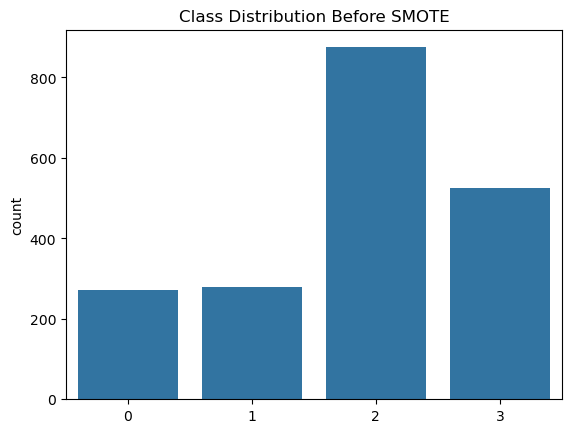


Class distribution after SMOTE: Counter({1: 875, 3: 875, 2: 875, 0: 875})


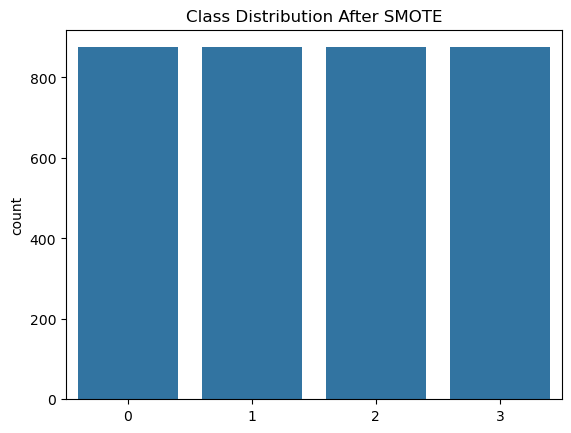

In [479]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Ensure target is encoded as integers
if y.dtype not in ['int32', 'int64']:
    le = LabelEncoder()
    y = le.fit_transform(y)

print("Target data type after encoding:", y.dtype)

# Display class distribution before SMOTE
print("\nClass distribution before SMOTE:", Counter(y))
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.show()

# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

# Display class distribution after SMOTE
print("\nClass distribution after SMOTE:", Counter(y_res))
sns.countplot(x=y_res)
plt.title('Class Distribution After SMOTE')
plt.show()


In [480]:
# split into training and testing test

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=8)

In [481]:
# Naive Bayes Model

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

In [482]:
# Decision Tree Model

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [483]:
# Random Forest Model

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf=rf_model.predict(x_test)

In [484]:
# KNN model

knn_model =KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

In [485]:
# Evaluation: Confusion Matrix and Metrics

#def evaluate_model(y_test, y_pred, model_name):
#    print(f"Model: {model_name}")
#    print("Confusion Matrix:")
#    print(confusion_matrix(y_test, y_pred))
#    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
#   print(f"Precision: {precision_score(y_test, y_pred):.2f}")
#    print(f"PRecall:   {recall_score(y_test, y_pred):.2f}")
#    print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}\n")

def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")  # Change here
    print(f"Recall:    {recall_score(y_test, y_pred, average='macro'):.2f}")  # Change here
    print(f"F1 Score:  {f1_score(y_test, y_pred, average='macro'):.2f}\n")  # Change here

In [486]:
# Evaluate all models

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "KNN")

Model: Naive Bayes
Confusion Matrix:
[[256   4   3   0]
 [109 101  25  36]
 [  0   1 244   3]
 [  8  43 150  67]]
Accuracy:  0.64
Precision: 0.64
Recall:    0.64
F1 Score:  0.59

Model: Decision Tree
Confusion Matrix:
[[261   2   0   0]
 [  5 252   0  14]
 [  0   0 248   0]
 [  0  16   3 249]]
Accuracy:  0.96
Precision: 0.96
Recall:    0.96
F1 Score:  0.96

Model: Random Forest
Confusion Matrix:
[[258   5   0   0]
 [  1 269   0   1]
 [  0   1 247   0]
 [  0  13   2 253]]
Accuracy:  0.98
Precision: 0.98
Recall:    0.98
F1 Score:  0.98

Model: KNN
Confusion Matrix:
[[259   4   0   0]
 [  8 243   3  17]
 [  1   3 237   7]
 [  8  26  12 222]]
Accuracy:  0.92
Precision: 0.92
Recall:    0.92
F1 Score:  0.92



In [487]:
# plot confusion matrix using seaborn library

cm1=confusion_matrix(y_test, y_pred_nb)
cm2=confusion_matrix(y_test, y_pred_dt)
cm3=confusion_matrix(y_test, y_pred_rf)
cm4=confusion_matrix(y_test, y_pred_knn)

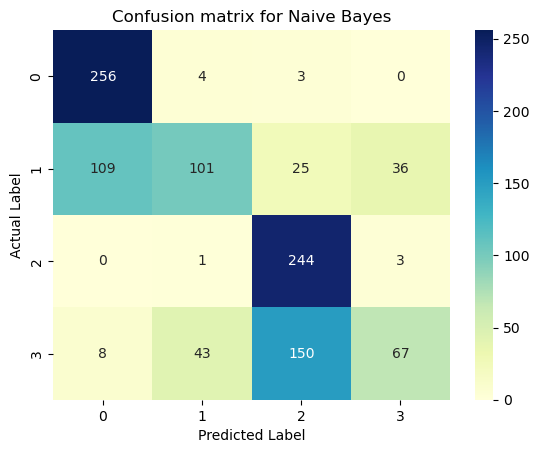

In [488]:
# confusion matrix for Naive Bayes

sns.heatmap(cm1, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for Naive Bayes');

In [489]:
# Does overfitting happen for Naive Bayes? We need to compare the accuracy of testing against accuracy of trainig

print ("Accuracy of Naive Bayes for training dataset is:", nb_model.score(x_train, y_train))

Accuracy of Naive Bayes for training dataset is: 0.6493877551020408


In [490]:
print ("Accuracy of Naive Bayes for testing dataset is:", nb_model.score(x_test, y_test))

Accuracy of Naive Bayes for testing dataset is: 0.6361904761904762


In [491]:
# No the accuracy for both training and testing are similar, so there is overfitting in this case. 
# we do not observe underfitting, because the accuracy of training is almost 90%, which is good, of course not perfect.

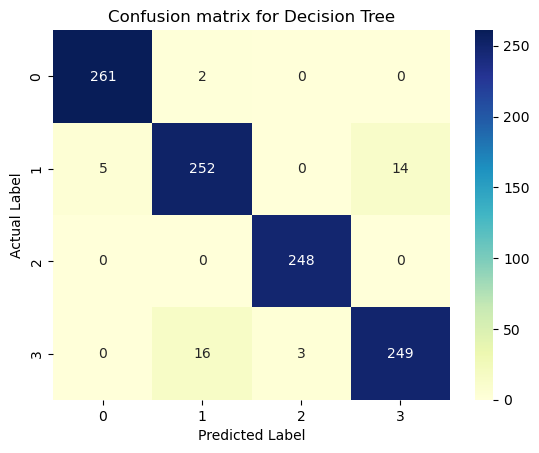

In [492]:
# confusion matrix for Decision Tree

sns.heatmap(cm2, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for Decision Tree');

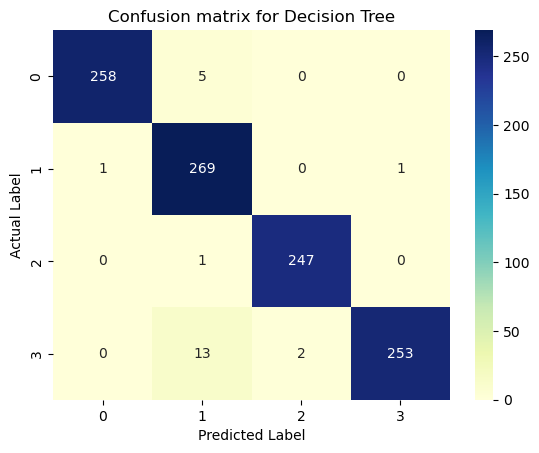

In [493]:
# confusion matrix for Raqndom Forest

sns.heatmap(cm3, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for Decision Tree');

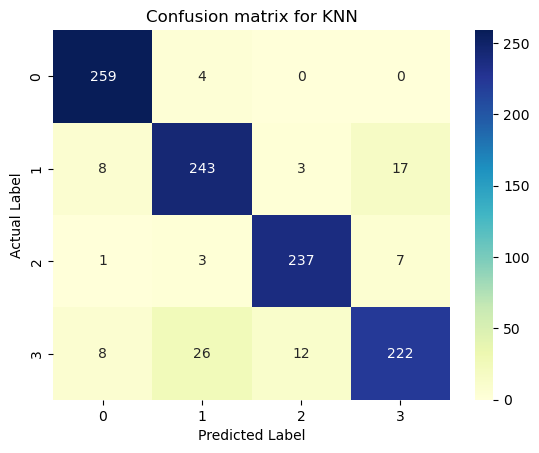

In [494]:
# confusion matrix for KNN

sns.heatmap(cm4, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for KNN');

In [495]:
# Random forest has the best performance. let's all the measures in a report

print(classification_report(y_test, y_pred_rf)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       263
           1       0.93      0.99      0.96       271
           2       0.99      1.00      0.99       248
           3       1.00      0.94      0.97       268

    accuracy                           0.98      1050
   macro avg       0.98      0.98      0.98      1050
weighted avg       0.98      0.98      0.98      1050



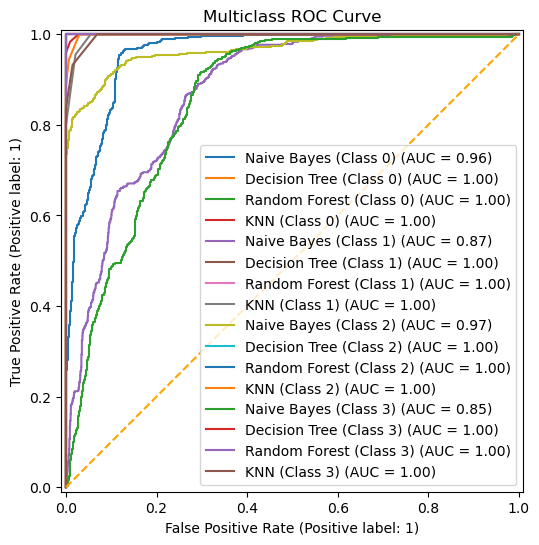

In [496]:
# plot ROC curve for Xtrain and Xtest

from sklearn.metrics import RocCurveDisplay

#disp =RocCurveDisplay.from_estimator(nb_model, x_train, y_train)
#RocCurveDisplay.from_estimator(dt_model, x_train, y_train, ax=disp.ax_)
#RocCurveDisplay.from_estimator(rf_model, x_train, y_train, ax=disp.ax_)
#RocCurveDisplay.from_estimator(knn_model, x_train, y_train, ax=disp.ax_)
#plt.plot([0,1], [1,0], color='orange', linestyle='--');

# Ensure y_train is binarized
from sklearn.preprocessing import label_binarize

y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])  # Adjust based on unique classes

# Compute probability scores for each model
y_score_nb = nb_model.predict_proba(x_train)
y_score_dt = dt_model.predict_proba(x_train)
y_score_rf = rf_model.predict_proba(x_train)
y_score_knn = knn_model.predict_proba(x_train)


import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(y_train_bin.shape[1]):  # Iterate over each class
    RocCurveDisplay.from_predictions(y_train_bin[:, i], y_score_nb[:, i], ax=ax, name=f"Naive Bayes (Class {i})")
    RocCurveDisplay.from_predictions(y_train_bin[:, i], y_score_dt[:, i], ax=ax, name=f"Decision Tree (Class {i})")
    RocCurveDisplay.from_predictions(y_train_bin[:, i], y_score_rf[:, i], ax=ax, name=f"Random Forest (Class {i})")
    RocCurveDisplay.from_predictions(y_train_bin[:, i], y_score_knn[:, i], ax=ax, name=f"KNN (Class {i})")

plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
plt.title("Multiclass ROC Curve")
plt.show()

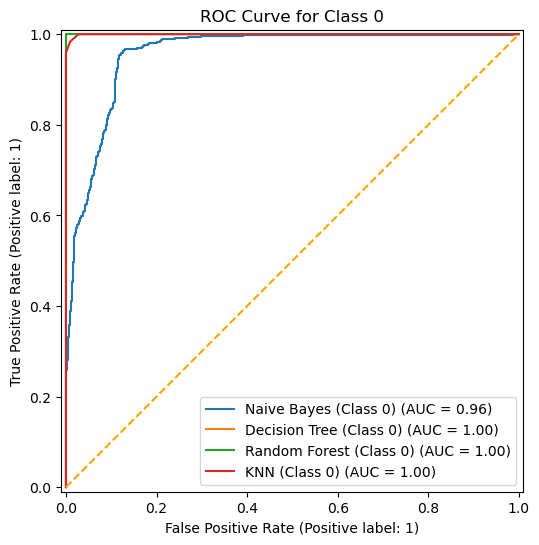

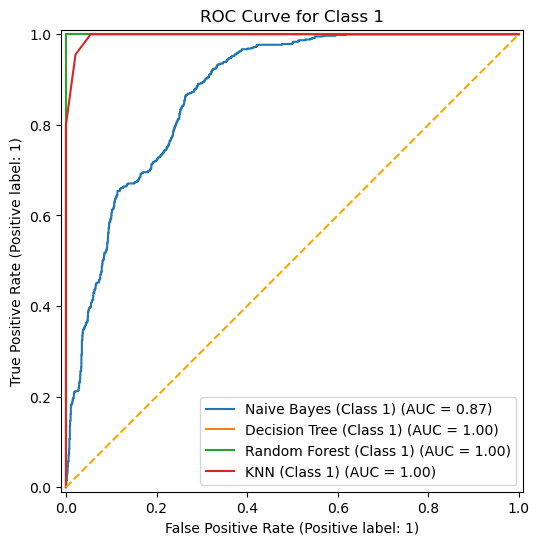

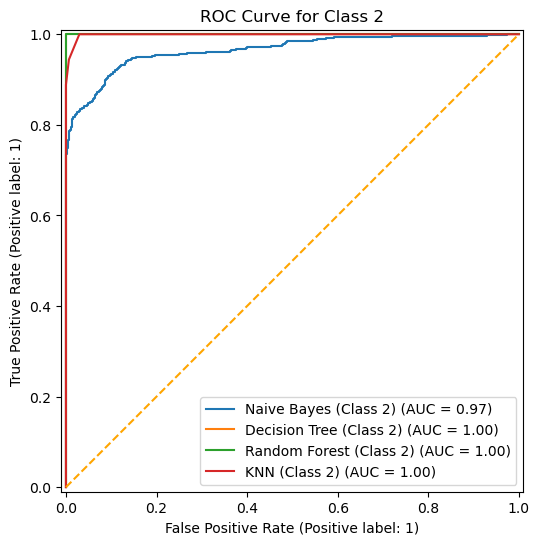

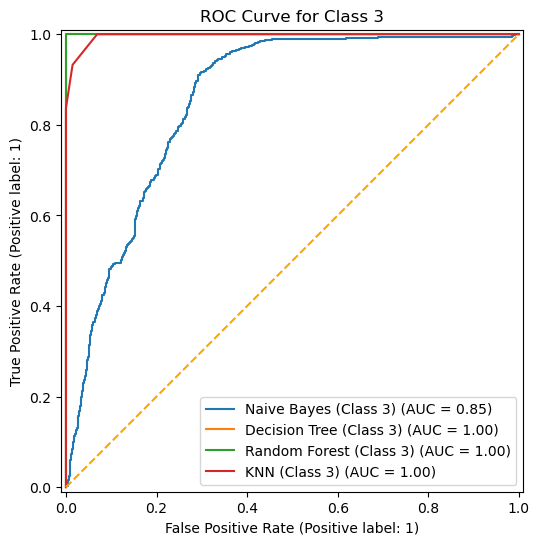

In [497]:
from sklearn.metrics import RocCurveDisplay

# Binarize the labels
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])  # Adjust based on unique classes

# Compute probability scores for each model
y_score_nb = nb_model.predict_proba(x_train)
y_score_dt = dt_model.predict_proba(x_train)
y_score_rf = rf_model.predict_proba(x_train)
y_score_knn = knn_model.predict_proba(x_train)

# Iterate over each class to create separate ROC curves
for i in range(y_train_bin.shape[1]):  # Iterate over each class
    # Create a new figure for each class
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the ROC curve for each model
    RocCurveDisplay.from_predictions(y_train_bin[:, i], y_score_nb[:, i], ax=ax, name=f"Naive Bayes (Class {i})")
    RocCurveDisplay.from_predictions(y_train_bin[:, i], y_score_dt[:, i], ax=ax, name=f"Decision Tree (Class {i})")
    RocCurveDisplay.from_predictions(y_train_bin[:, i], y_score_rf[:, i], ax=ax, name=f"Random Forest (Class {i})")
    RocCurveDisplay.from_predictions(y_train_bin[:, i], y_score_knn[:, i], ax=ax, name=f"KNN (Class {i})")

    # Add a "no skill" line
    ax.plot([0, 1], [0, 1], color="orange", linestyle="--")
    
    # Title and show each figure
    ax.set_title(f"ROC Curve for Class {i}")
    plt.show()


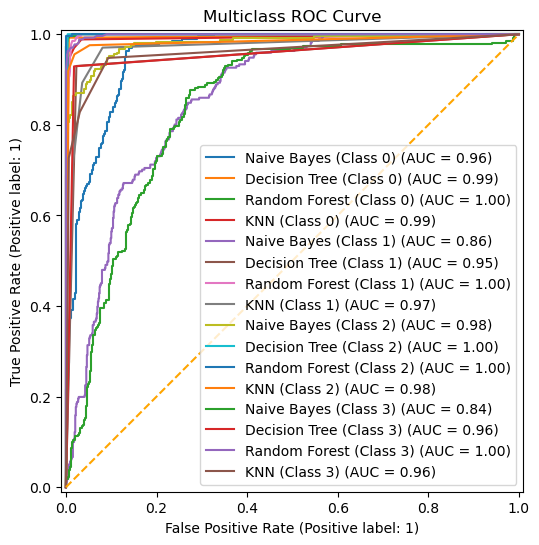

In [498]:
# ROC Curve for Testing dataset

#disp =RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
#RocCurveDisplay.from_estimator(dt_model, X_test, y_test, ax=disp.ax_)
#RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=disp.ax_)
#RocCurveDisplay.from_estimator(knn_model, X_test, y_test, ax=disp.ax_)
#plt.plot([0,1], [1,0], color='orange', linestyle='--');



# Ensure y_train is binarized
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust based on unique classes

# Compute probability scores for each model
y_score_nb = nb_model.predict_proba(x_test)
y_score_dt = dt_model.predict_proba(x_test)
y_score_rf = rf_model.predict_proba(x_test)
y_score_knn = knn_model.predict_proba(x_test)


import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(y_train_bin.shape[1]):  # Iterate over each class
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_nb[:, i], ax=ax, name=f"Naive Bayes (Class {i})")
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_dt[:, i], ax=ax, name=f"Decision Tree (Class {i})")
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_rf[:, i], ax=ax, name=f"Random Forest (Class {i})")
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_knn[:, i], ax=ax, name=f"KNN (Class {i})")

plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
plt.title("Multiclass ROC Curve")
plt.show()

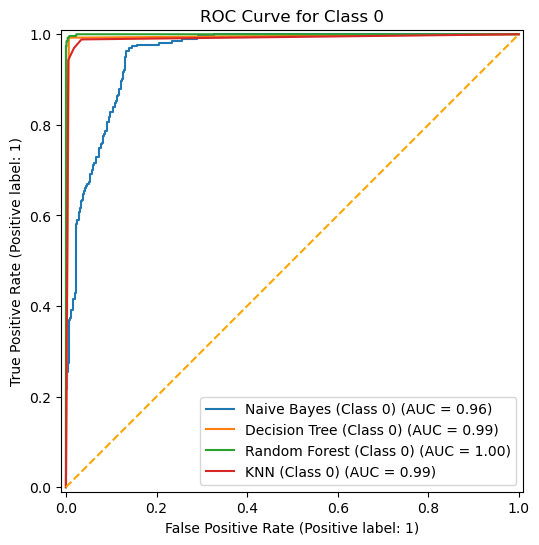

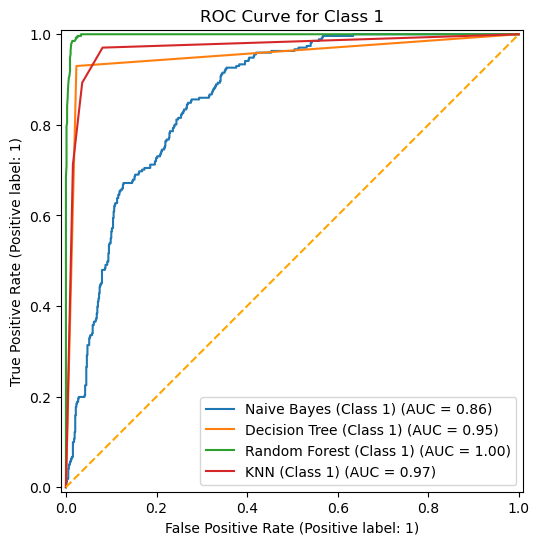

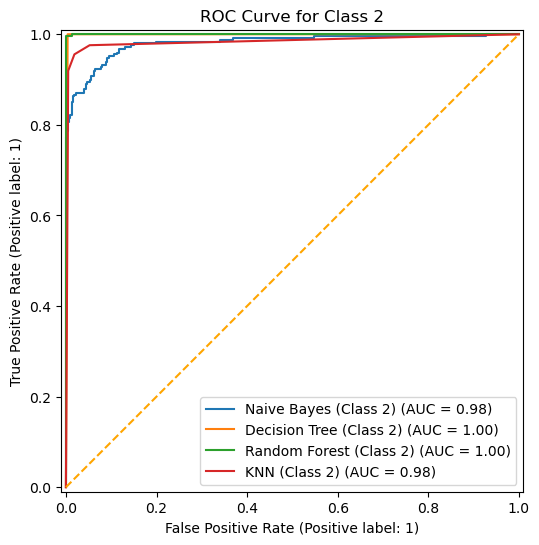

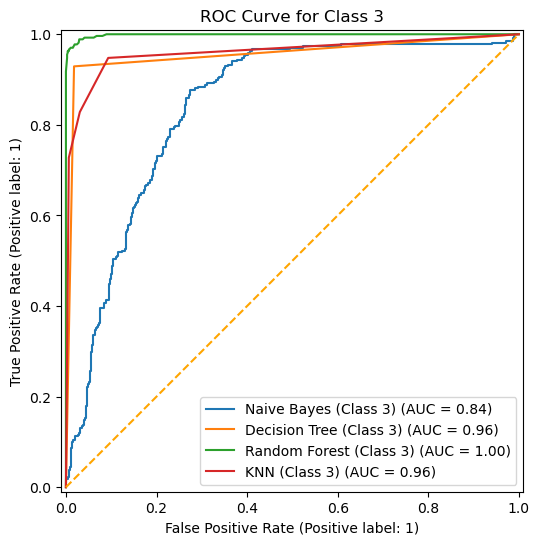

In [499]:
from sklearn.metrics import RocCurveDisplay

# Binarize the test labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust based on unique classes

# Compute probability scores for each model
y_score_nb = nb_model.predict_proba(x_test)
y_score_dt = dt_model.predict_proba(x_test)
y_score_rf = rf_model.predict_proba(x_test)
y_score_knn = knn_model.predict_proba(x_test)

# Iterate over each class to create separate ROC curves for the test set
for i in range(y_test_bin.shape[1]):  # Iterate over each class
    # Create a new figure for each class
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the ROC curve for each model
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_nb[:, i], ax=ax, name=f"Naive Bayes (Class {i})")
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_dt[:, i], ax=ax, name=f"Decision Tree (Class {i})")
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_rf[:, i], ax=ax, name=f"Random Forest (Class {i})")
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score_knn[:, i], ax=ax, name=f"KNN (Class {i})")

    # Add a "no skill" line
    ax.plot([0, 1], [0, 1], color="orange", linestyle="--")
    
    # Title and show each figure
    ax.set_title(f"ROC Curve for Class {i}")
    plt.show()


In [500]:
# Make a new prediction for new patients (new observations)

# load new observations (new patients)

new_data=pd.read_excel("PredObesityDataSet.xlsx")

In [501]:
new_data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,CALC,MTRANS
0,0,0.33,0.32,0.19,1,0,0.50,2,0,0.50,0,0.00,3,3
1,1,0.62,0.66,0.36,0,0,1.00,2,0,0.50,0,0.67,1,4
2,0,0.33,0.49,0.69,1,1,1.00,2,0,0.36,0,0.56,2,3
3,1,0.39,0.52,0.48,0,1,0.50,1,1,0.42,1,0.00,1,2
4,0,0.33,0.51,0.31,1,1,0.50,1,0,0.50,1,0.67,2,3


In [502]:
# random forest (rf) had the best performance so far. Let's apply random forest on new observations
# and predict the class of Outcome for two new observations

In [503]:
y_pred_new_observation=rf_model.predict(new_data)

In [504]:
y_pred_new_observation

array([1, 3, 2, 2, 3, 0])

In [505]:
# Find the importance of features ----- Features importance using Random Forest

rf=RandomForestClassifier(random_state=1, n_estimators=100)

In [506]:
rf.fit(x,y)

RandomForestClassifier(random_state=1)

In [507]:
I = rf.feature_importances_

In [508]:
I

array([0.0217403 , 0.07697422, 0.09158336, 0.45365958, 0.05421432,
       0.01992692, 0.05749049, 0.05781344, 0.00297526, 0.04793917,
       0.01075277, 0.05277703, 0.02622389, 0.02592925])

In [509]:
df1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'CALC', 'MTRANS',
       'Outcome'],
      dtype='object')

In [510]:
# we need the name of features columns. df1.columns include Outcome name. we need to drop Outcome 

# Define a variable that contains only the feature column names

name_features = df1.drop(columns = ['Outcome']).columns.tolist()

In [511]:
name_features

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'CALC',
 'MTRANS']

In [512]:
len(name_features)

14

In [513]:
len(I)

14

In [514]:
# generate a new dataframe call it df_I

df1_I=pd.DataFrame([I, name_features])

In [515]:
df1_I

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.02,0.08,0.09,0.45,0.05,0.02,0.06,0.06,0.00,0.05,0.01,0.05,0.03,0.03
1,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,CALC,MTRANS


<Axes: xlabel='Importance', ylabel='Feature'>

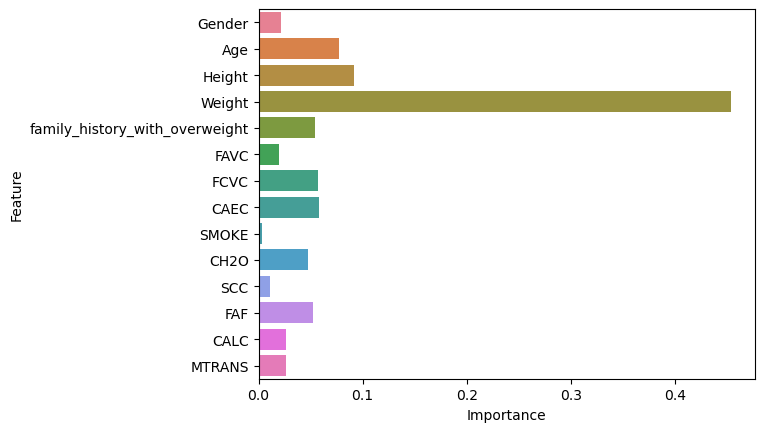

In [516]:
# plot the feature importance

df1_I_transposed = df1_I.T
df1_I_transposed.columns = ['Importance','Feature']
sns.barplot(data=df1_I_transposed, y='Feature', x='Importance', hue="Feature")

In [517]:
# find the best value of K in KNN

from sklearn.metrics import balanced_accuracy_score

In [518]:
error=[]

#calculating the error for k values between 1 and 39

for i in range(1,21):  # i=1,2,...,20
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy = balanced_accuracy_score(y_test, pred_i)
    error.append(1-accuracy)

error;

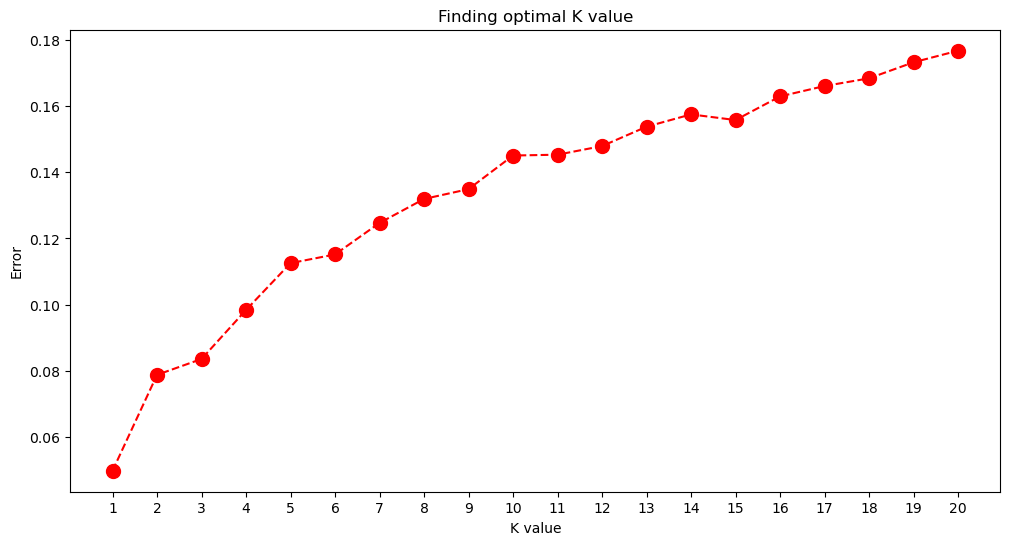

In [519]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(range(1,21), error, color='red',   linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title ('Finding optimal K value')
plt.xlabel ('K value')
plt.ylabel('Error');

# Set the ticks on the X-axis to integer values
plt.xticks(ticks=range(1, 21));  # Set the ticks to integers 1 to 20


##  CONDITIONAL PROBABILITY

In [521]:
# Find conditional proabilities

# P (Outcome = OverWeight | family_history_with_overweigh = Yes)
# First, find no of people who have family_history_with_overweight = Yes ?

(df1['family_history_with_overweight'] == 1).sum()

1579

In [522]:
((df1['family_history_with_overweight'] == 1) & (df1['Outcome'] == 3)).sum()

436

### P (Outcome = Overweight | family_history_with_overweigh = Yes) = 436/1579 =0.276 

In [524]:
# Find conditional proabilities

# P (Outcome = OverWeight | family_history_with_overweigh = No)
# First, find no of people who have family_history_with_overweight = Yes ?

(df1['family_history_with_overweight'] == 0).sum()

372

In [525]:
# find number of people with family history of overweight & they are overweight

((df1['family_history_with_overweight'] == 0) & (df1['Outcome'] == 3)).sum()

89

### P (Outcome = Overweight | family_history_with_overweight = No) = 89/372 = 0.239 or 23.9%

In [527]:
# Find conditional proabilities

# P (Outcome = Normal_Weight | family_history_with_overweight = Yes)
# First, find no of people who have family_history_with_overweight = Yes ?

(df1['family_history_with_overweight'] == 1).sum()

1579

In [528]:
# find number of people with family history of overweight & they are Normal_Weight

((df1['family_history_with_overweight'] == 1) & (df1['Outcome'] == 1)).sum()

149

### P (Outcome = Normal_Weight | family_history_with_overweight = Yes) = 149/1579 = 0.0944 or 9.44%


In [530]:
# Find conditional proabilities

# P (Outcome = Normal_Weight | family_history_with_overweight = No)
# First, find no of people who have family_history_with_overweight = No ?

(df1['family_history_with_overweight'] == 0).sum()

372

In [531]:
# find number of people with family history of overweight = No & they are Normal_Weight

((df1['family_history_with_overweight'] == 0) & (df1['Outcome'] == 1)).sum()

131

### P (Outcome = Normal_Weight | family_history_with_overweight = No) = 131/372 =0.352  or 35.2%

In [533]:
# Find conditional proabilities

# P (Outcome = Obesity | family_history_with_overweight = Yes)
# First, find no of people who have family_history_with_overweight = Yes ?

(df1['family_history_with_overweight'] == 1).sum()

1579

In [534]:
# find number of people with family history of overweight & they are Obesity

((df1['family_history_with_overweight'] == 1) & (df1['Outcome'] == 2)).sum()

868

### P (Outcome = Obesity | family_history_with_overweight = Yes) = 868/1579 =0.55 or 55%

In [536]:
# Find conditional proabilities

# P (Outcome = Obesity | family_history_with_overweight = No)
# First, find no of people who have family_history_with_overweight = No ?

(df1['family_history_with_overweight'] == 0).sum()

372

In [537]:
# find number of people with family history of overweight = No & they are Obesity

((df1['family_history_with_overweight'] == 0) & (df1['Outcome'] == 2)).sum()

7

### P (Outcome = Obesity | family_history_with_overweight = No) = 7/372 =0.0188  or 1.88%

In [539]:
# Find conditional proabilities

# P (Outcome = Insufficient_Weight | family_history_with_overweight = Yes)
# First, find no of people who have family_history_with_overweight = Yes ?

(df1['family_history_with_overweight'] == 1).sum()

1579

In [540]:
# find number of people with family history of overweight & they are Insufficient Weight

((df1['family_history_with_overweight'] == 1) & (df1['Outcome'] == 0)).sum()

126

### P (Outcome = Insufficient_Weight | family_history_with_overweight = Yes) = 126/1579 =0.0798 or 7.98

In [542]:
# Find conditional proabilities

# P (Outcome = Insufficient_Weight | family_history_with_overweight = No)
# First, find no of people who have family_history_with_overweight = No ?

(df1['family_history_with_overweight'] == 0).sum()

372

In [543]:
# find number of people with family history of overweight = No & they are Insufficient Weight

((df1['family_history_with_overweight'] == 0) & (df1['Outcome'] == 0)).sum()

145

### P (Outcome = Insufficient_Weight | family_history_with_overweight = No) = 145/372 =0.39 or 39%

### Feature Importance 

P(Outcome = Insufficient_Weight | family_history_with_overweight = Yes) = 0.0798 </br>
P(Outcome = Insufficient_Weight | family_history_with_overweight = No) = 0.39 </br>
Feature Importance (Insufficient_Weight | family_history_with_overweight) = 0.39-0.0798 =0.31 or 31%

P(Outcome = Obesity | family_history_with_overweight = Yes) = 0.55 </br>
P(Outcome = Obesity | family_history_with_overweight = No) = 0.0188 </br>
Feature Importance (Obesity | family_history_with_overweight) = 0.55-0.0188=0.531 or 53%

P(Outcome = Normal_Weight | family_history_with_overweight = Yes) = 0.0944 </br>
P(Outcome = Normal_Weight | family_history_with_overweight = No) = 0.352 </br>
Feature Importance (Normal_Weight | family_history_with_overweight) = 0.352-0.0944 =0.258 or 25.8%  

P(Outcome = Overweight | family_history_with_overweight = Yes) = 0.276 </br>
P(Outcome = Overweight | family_history_with_overweight = No) = 0.239 </br>
Feature Importance (Overweight | family_history_with_overweight) = 0.276-0.239=0.037  or 3.7% 


Conditional probabilities for Gender:
 col_0     0    1    2    3
Gender                    
0      0.63 0.49 0.49 0.40
1      0.37 0.51 0.51 0.60

Conditional probabilities for Age:
 col_0    0    1    2    3
Age                      
0.00  0.00 0.00 0.00 0.00
0.05  0.00 0.00 0.00 0.00
0.10  0.02 0.02 0.00 0.01
0.14  0.11 0.06 0.01 0.03
0.19  0.23 0.15 0.07 0.08
0.24  0.19 0.12 0.04 0.09
0.29  0.15 0.11 0.04 0.08
0.33  0.09 0.16 0.10 0.16
0.38  0.08 0.09 0.08 0.09
0.43  0.09 0.10 0.12 0.11
0.48  0.01 0.04 0.06 0.05
0.52  0.00 0.04 0.06 0.03
0.57  0.00 0.04 0.22 0.02
0.62  0.00 0.01 0.02 0.04
0.67  0.00 0.00 0.02 0.01
0.71  0.00 0.01 0.02 0.02
0.76  0.00 0.01 0.04 0.02
0.81  0.00 0.01 0.05 0.03
0.86  0.00 0.00 0.02 0.02
0.90  0.00 0.02 0.01 0.04
0.95  0.00 0.00 0.01 0.04
1.00  0.00 0.00 0.00 0.02

Conditional probabilities for Height:
 col_0     0    1    2    3
Height                    
0.00   0.00 0.00 0.00 0.00
0.02   0.00 0.00 0.00 0.00
0.06   0.00 0.00 0.00 0.01
0.08   0.00 0.00

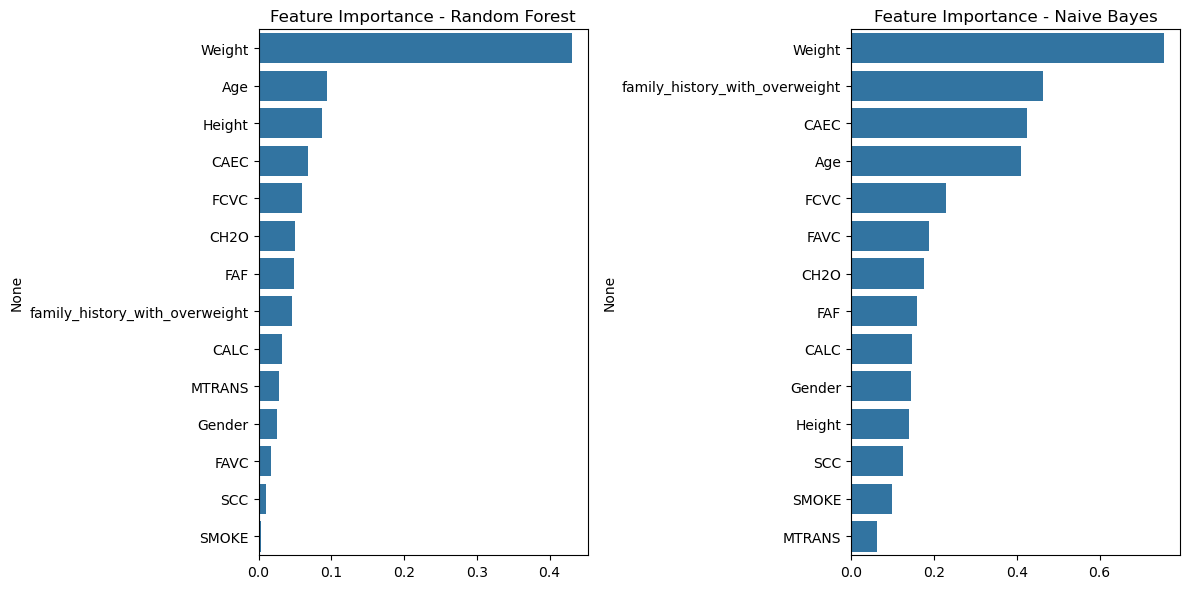

In [547]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Calculate conditional probabilities
conditional_probs = {}
for feature in x.columns:
    prob_df = pd.crosstab(x[feature], y, normalize='columns')
    conditional_probs[feature] = prob_df
    print(f"\nConditional probabilities for {feature}:\n", prob_df)

# Split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=8)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Random Forest for Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)
feature_importances_rf = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)

# Naive Bayes for Feature Importance
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)
y_pred = nb.predict(x_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred)
print("\nNaive Bayes Accuracy:", accuracy_nb)

# Calculate Feature Importance using Naive Bayes
# Using the variance of each feature weighted by the model's coefficients
feature_importances_nb = np.abs(nb.theta_).mean(axis=0)
feature_importances_nb = pd.Series(feature_importances_nb, index=x.columns).sort_values(ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importances_rf.values, y=feature_importances_rf.index)
plt.title('Feature Importance - Random Forest')

plt.subplot(1, 2, 2)
sns.barplot(x=feature_importances_nb.values, y=feature_importances_nb.index)
plt.title('Feature Importance - Naive Bayes')

plt.tight_layout()
plt.show()


## VISUALIZATION

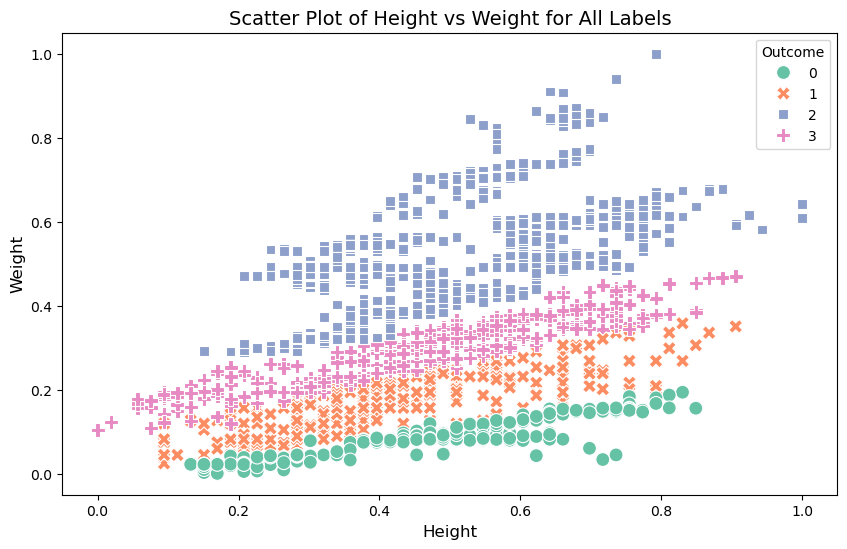

In [549]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Height', y='Weight', hue='Outcome', style='Outcome', palette='Set2', s=100)
plt.title('Scatter Plot of Height vs Weight for All Labels', fontsize=14)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.legend(title='Outcome', fontsize=10)
plt.show()

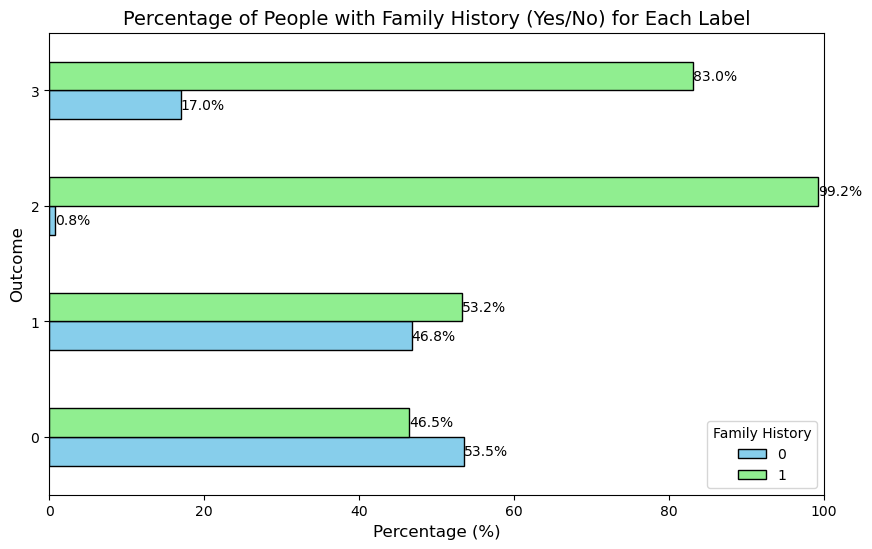

In [550]:
# Group the data by 'family_history_with_overweight' and 'Outcome'
family_history_counts = df1.groupby(['Outcome', 'family_history_with_overweight']).size().unstack()

# Calculate the percentage
family_history_percentage = family_history_counts.div(family_history_counts.sum(axis=1), axis=0) * 100

# Plot the bar graph
ax = family_history_percentage.plot(kind='barh', figsize=(10, 6), color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Percentage of People with Family History (Yes/No) for Each Label', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Outcome', fontsize=12)
plt.xlim(0, 100)  # Set x-axis limit to 100%
plt.legend(title='Family History', fontsize=10)

# Annotate the bars with values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

plt.show()

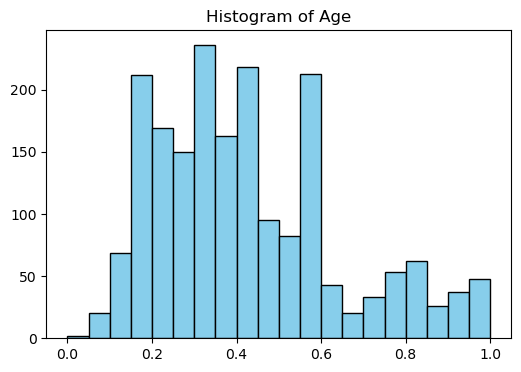

In [551]:
# Histogram of Age
plt.figure(figsize=(6, 4))
plt.hist(df1['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.show()


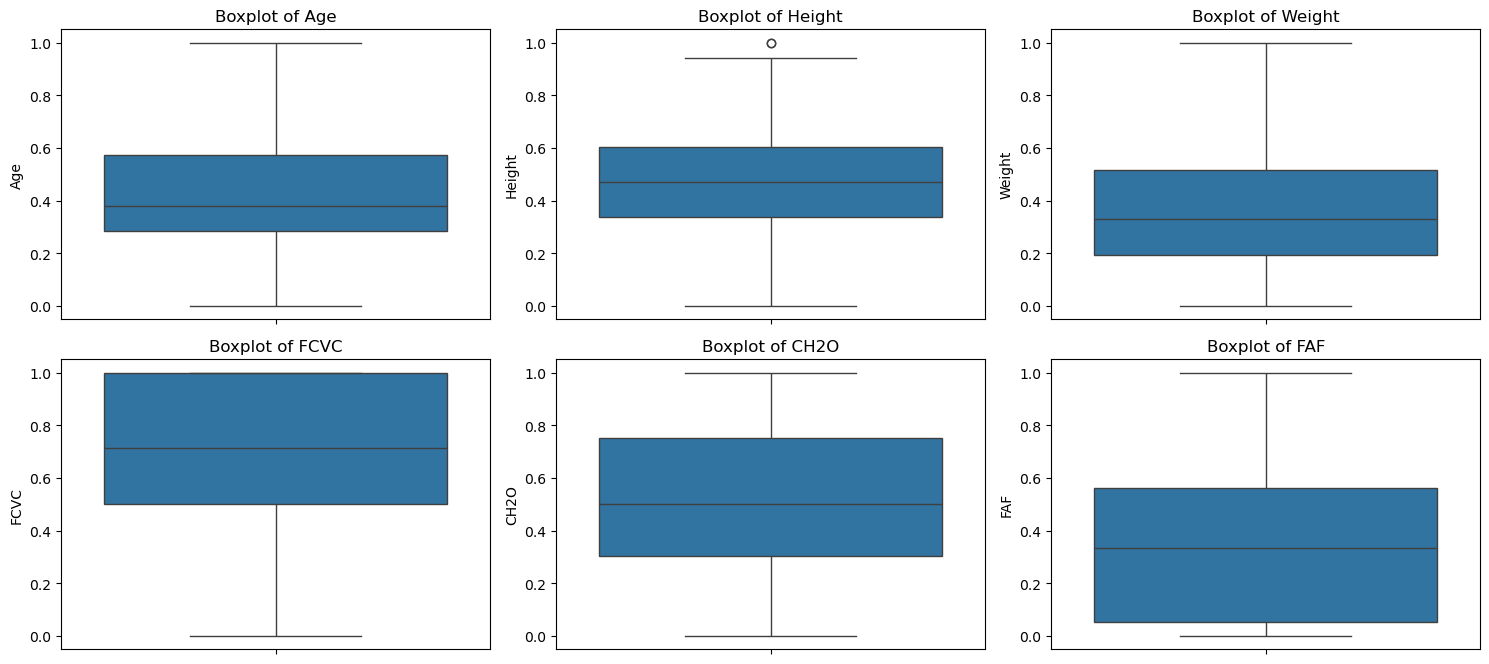

In [552]:
# Boxplots for all numerical parameters
#numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df1[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

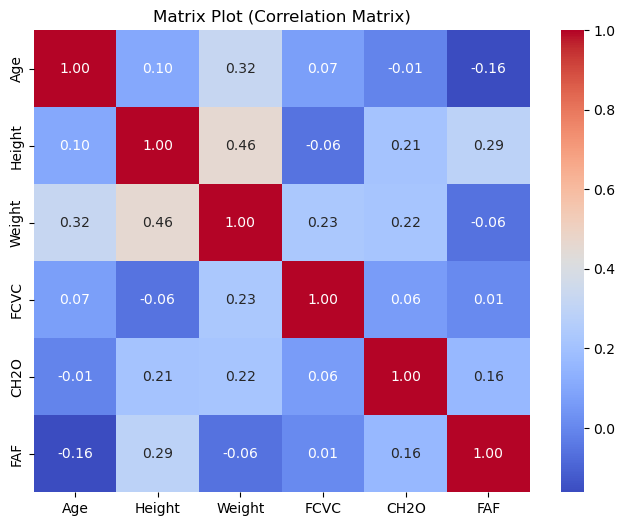

In [553]:
# Matrix Plot (Correlation Matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matrix Plot (Correlation Matrix)')
plt.show()